In [1]:
# Import Library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./data_2.csv"
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 0.8}
    , "adopted_comp": 2
}

In [4]:
# Load Data
df = pd.read_csv(CONFIG['data_dir'], index_col=0).T
df

GeneSymbol,1-Mar,1-Mar,1-Mar,2-Mar,2-Mar,2-Mar,3-Mar,3-Mar,4-Mar,5-Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCE-group1,1.852497,0.117975,0.096768,2.258558,1.565394,0.951552,89.512565,59.216253,1.611960,1.441417,...,0.030428,0.027581,0.019023,0.015966,0.012914,0.010145,0.008056,0.007782,0.003657,0.002025
HCE-group2,1.095036,0.104545,0.102656,1.822708,1.508817,1.068145,80.511893,65.378596,2.374740,1.643976,...,0.037001,0.024705,0.028065,0.027993,0.011780,0.008080,0.007229,0.019845,0.004915,0.001820
HCE-group3,1.289244,0.223035,0.140014,1.879612,1.655656,0.987388,89.221036,80.427167,0.968084,1.596748,...,0.080276,0.029031,0.038464,0.023639,0.013711,0.009553,0.010577,0.022200,0.008151,0.002139
iPS-1,0.795035,2.326683,2.433341,1.053267,1.291705,1.050282,0.290673,0.861818,1.354134,0.425520,...,7.548912,0.017927,1.836428,1.967620,6.261272,3.290751,1.066276,1.643213,2.105379,0.682089
iPS-2,0.813065,2.830170,3.330543,1.337434,1.436007,1.012773,0.547228,1.200644,1.113175,0.550807,...,3.198438,0.018212,1.915520,1.807458,8.964918,2.898218,0.930122,2.253860,1.928423,0.514673
iPS-3,0.712260,2.303361,2.855312,0.995234,1.493473,0.916881,0.527325,1.106951,1.032968,0.524999,...,5.487027,0.015698,1.589922,1.633464,9.723765,2.608060,0.880221,2.886146,1.745888,0.457960
CECSi -1,66.717323,1.040646,0.979447,1.200681,1.421945,1.376088,3.387656,4.717717,14.015582,1.002661,...,0.286610,0.019466,0.738614,0.833685,0.181713,0.081033,0.529764,0.996136,0.801392,0.694796
CECSi -2,56.733482,0.980855,1.026891,1.250500,1.690599,1.684334,4.955218,5.193243,9.758420,0.861033,...,0.259396,0.017610,0.946701,0.948059,0.142464,0.023932,0.833234,1.003879,1.010467,0.997505
CECSi -3,56.656556,1.019519,1.020984,1.533656,1.425587,1.761829,4.474247,5.482150,8.543179,0.997346,...,0.223554,0.017058,0.979280,0.966614,0.125888,0.019081,0.633620,0.871975,0.989641,1.052928
NCC-1,1.538074,1.739433,2.030810,0.331068,0.497219,0.626695,1.291381,0.551392,0.801544,1.156930,...,1.969104,2.092500,1.783416,1.249824,2.787335,1.964172,1.164651,2.777873,1.247950,1.644203


In [5]:
# PCA
model = PCA(random_state=0)
model.fit(df)
Rdata = pd.DataFrame(model.transform(df), index=df.index, columns=[f"PCA{i}"for i in range(1, min(len(df), len(df.T))+1)])

In [6]:
# Contribution
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

cont = pd.DataFrame(temp
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PC_{i}" for i in range(1, min(len(df), len(df.T))+1)]
).T
cont

,contribution [%],cumulative contribution [%]
PC_1,97.63,97.63
PC_2,1.06,98.69
PC_3,0.72,99.41
PC_4,0.29,99.69
PC_5,0.26,99.95
PC_6,0.04,99.99
PC_7,0.01,100.00
PC_8,0.00,100.00
PC_9,0.00,100.00
PC_10,0.00,100.00


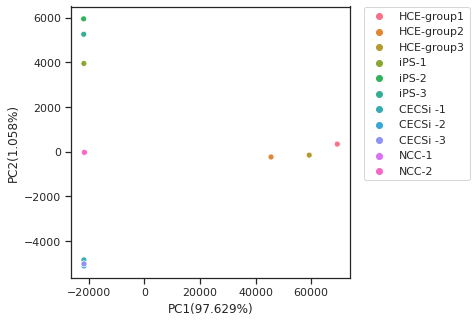

In [7]:
# Plot
sns.set() 
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (5,5))
[pc1, pc2] = model.explained_variance_ratio_[0:2]
PC1 = round(100*pc1, 3)
PC2 = round(100*pc2, 3)
sns.scatterplot(x="PCA1", y="PCA2", data=Rdata, hue=Rdata.index)
ax.set(xlabel=f"PC1({PC1}%)",ylabel=f"PC2({PC2}%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)